In [0]:
import requests
import json
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Getting statewise data

In [0]:
response = requests.get("https://api.covid19india.org/data.json")
# Get the response data as a python object. Verify that it's a dictionary.
data = response.json()

In [0]:
name=input('State: ')
detail=[]
for x in data['statewise']:
  #print(x['state'].lower())
  if name.lower()== x['state'].lower():
    detail.extend([x['confirmed'],x['active'],x['deaths'],x['recovered']])
print('No. of confirmed cases: '+str(detail[0]))
print('No. of active cases: '+str(detail[1]))
print('No. of deaths cases: '+str(detail[2]))
print('No. of recovered cases: '+str(detail[3]))

State: Goa
No. of confirmed cases: 79
No. of active cases: 22
No. of deaths cases: 0
No. of recovered cases: 57


### Constructing series object

In [0]:
confirmed= pd.Series([x['confirmed'] for x in data['statewise'][1:]], index=[x['state'] for x in data['statewise'][1:]]).astype('int')
active= pd.Series([x['active'] for x in data['statewise'][1:]], index=[x['state'] for x in data['statewise'][1:]]).astype('int')
deaths= pd.Series([x['deaths'] for x in data['statewise'][1:]], index=[x['state'] for x in data['statewise'][1:]]).astype('int')
recovered= pd.Series([x['recovered'] for x in data['statewise'][1:]], index=[x['state'] for x in data['statewise'][1:]]).astype('int')
confirmed

Maharashtra                                 72300
Tamil Nadu                                  24586
Delhi                                       22132
Gujarat                                     17632
Rajasthan                                    9373
Madhya Pradesh                               8420
Uttar Pradesh                                8729
West Bengal                                  6168
State Unassigned                             6414
Bihar                                        4096
Andhra Pradesh                               3791
Karnataka                                    3796
Telangana                                    2891
Jammu and Kashmir                            2718
Haryana                                      2652
Punjab                                       2342
Odisha                                       2245
Assam                                        1562
Kerala                                       1413
Uttarakhand                                  1043


### Constructing dataframe table for better visualization

In [0]:
list_of_series = [confirmed.values, active, deaths, recovered]
df = pd.DataFrame({'confirmed':confirmed.values,'active': active.values,'deaths': deaths.values, 'recovered':recovered.values},index=confirmed.index)
df.head() # first five rows

,confirmed,active,deaths,recovered
Maharashtra,72300,38502,2465,31333
Tamil Nadu,24586,10680,200,13706
Delhi,22132,12333,556,9243
Gujarat,17632,4646,1092,11894
Rajasthan,9373,2735,203,6435


## Comparing state-wise cases

### Active cases

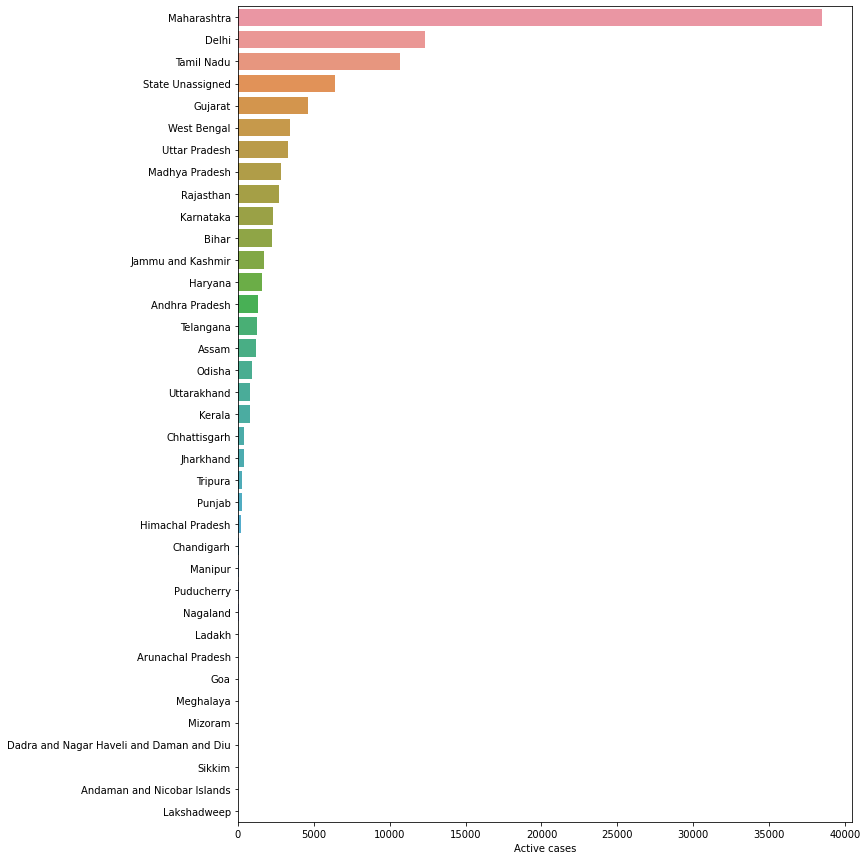

In [0]:
plt.figure(figsize=(11,15))
ax=sns.barplot(df.active.sort_values(ascending= False).values, df.active.sort_values(ascending= False).index)
_=plt.xlabel('Active cases')

We can see Maharashtra has the most active cases followed by Delhi.

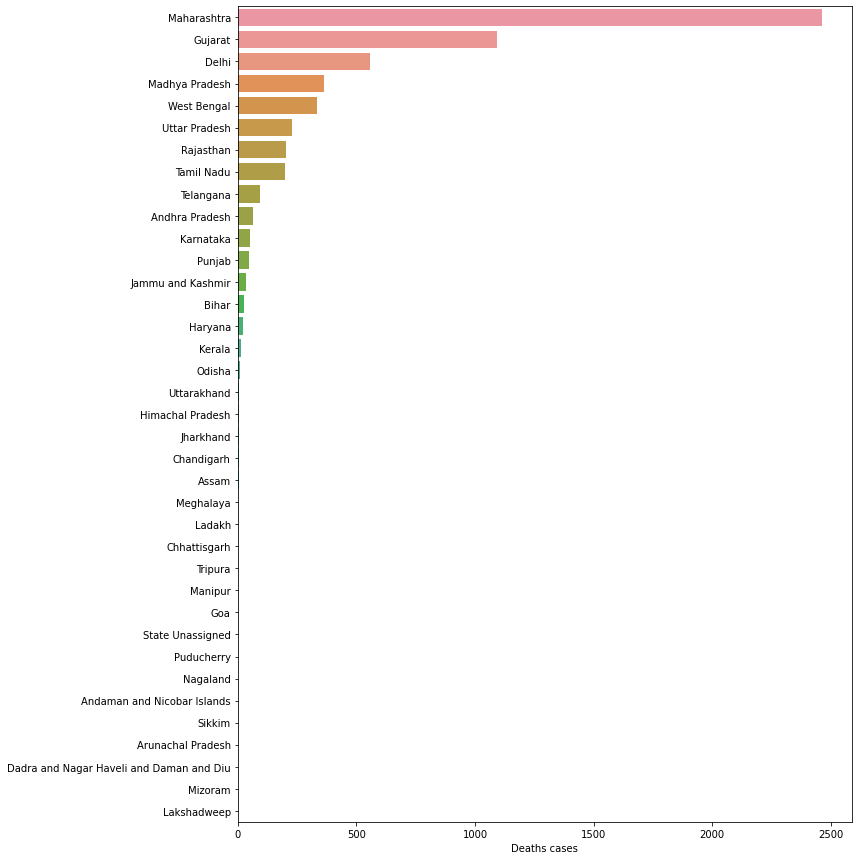

In [0]:
plt.figure(figsize=(11,15))
ax=sns.barplot(df.deaths.sort_values(ascending= False).values, df.deaths.sort_values(ascending= False).index)
_=plt.xlabel('Deaths cases')

Again Maharashtra is having most registered deaths. But Gujarat, which was on 5th position in most active cases list is now on 2nd position here.

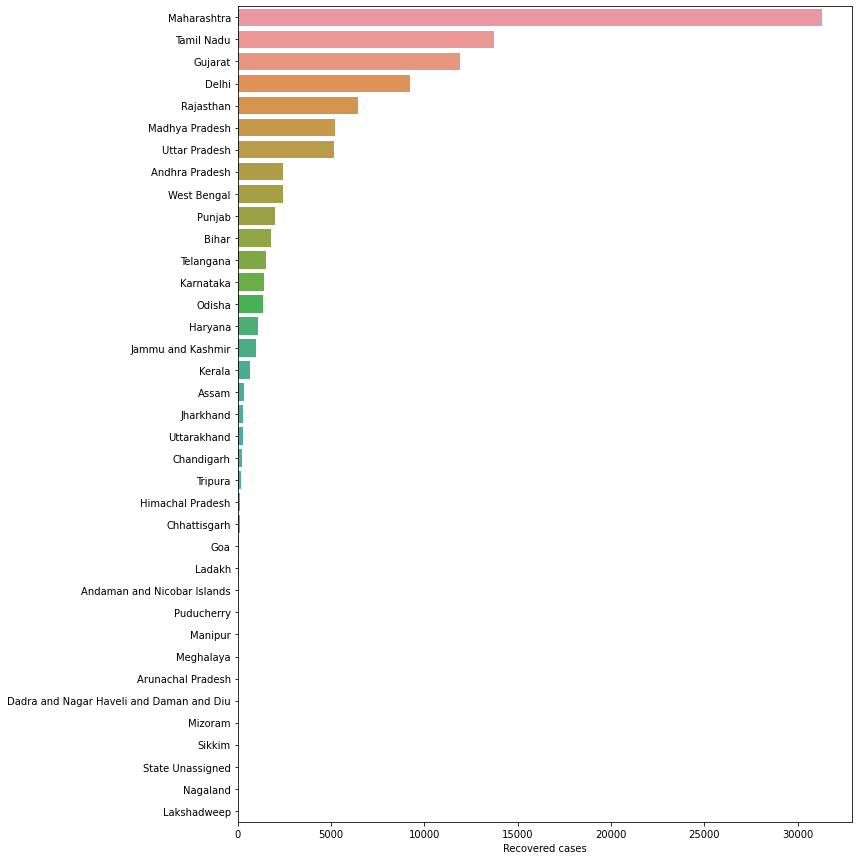

In [0]:
plt.figure(figsize=(11,15))
ax=sns.barplot(df.recovered.sort_values(ascending= False).values, df.recovered.sort_values(ascending= False).index)
_=plt.xlabel('Recovered cases')

Maharashtra has also most number of recovered cases followed by Tamil Nadu.

### Total cases in our country

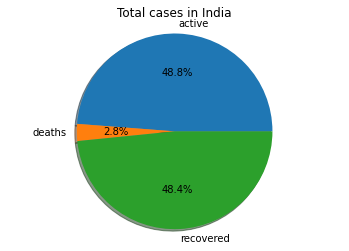

In [0]:
a=data['statewise'][0]
sizes=[a['active'],a['deaths'],a['recovered']]
labels= df.columns[1:]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Total cases in India')
plt.show()

### Datewise trends of cases

In [0]:
from dateutil import parser
date_list=[parser.parse(x) for x in df1.date] # parsing the dates in string format to datetime format

In [0]:
df1=pd.DataFrame(data['cases_time_series']).iloc[:,3:] # building required dataframe
df1.index=date_list
df1.drop('date',1,inplace=True)
df1.head()

,totalconfirmed,totaldeceased,totalrecovered
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,1,0,0
2020-02-02,2,0,0
2020-02-03,3,0,0


In [0]:
df1.totalconfirmed=df1.totalconfirmed.astype('int')
df1.totaldeceased=df1.totaldeceased.astype('int')
df1.totalrecovered=df1.totalrecovered.astype('int')

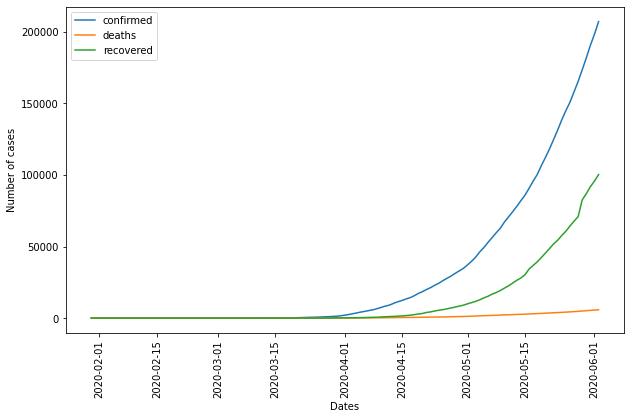

In [0]:
plt.figure(figsize=(10,6))
plt.plot(df1.totalconfirmed, label='confirmed')
plt.plot(df1.totaldeceased, label='deaths')
plt.plot(df1.totalrecovered, label='recovered')
plt.ylabel('Number of cases')
plt.xlabel('Dates')
plt.legend()
_=plt.xticks(rotation=90)